In [1]:
import matplotlib.pyplot as plt
import numpy as np

import allel
import os

from sai.utils.generators import SaiWindowDataGenerator
from sai.utils.generators import ChunkGenerator

from numpy.lib.stride_tricks import sliding_window_view

from sai.stats.scct_feature import *


In [2]:
vcf_chr9 = os.path.join("examples", "data", "1KG.nea_den.chr9.example.vcf.gz")
ref_ind_file = os.path.join("examples", "data", "1KG.ref.samples.txt")
tgt_ind_file = os.path.join("examples", "data", "1KG.tgt.samples.txt")
src_ind_file = os.path.join("examples", "data", "1KG.src.samples.txt")

In [3]:
vcf_file_allel = allel.read_vcf(vcf_chr9)

In [4]:
genotypes = vcf_file_allel['calldata/GT']
genotype_array = allel.GenotypeArray(genotypes)


## parameters for base-pair windows

In [5]:
anc_allele_file = None
win_len = 50000
win_step = 10000
chr_name = "9"
vcf_file = vcf_chr9
ploidy = 2

In [6]:
is_phased = True

# unstandardized (i.e. alpha ratio set to 1)

snp_window_size (71) is larger than the number of SNPs (65). Returning [0].
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error:

Text(0.5, 1.0, 'SCCT in base-pair windows, win_len: 50000, win_step: 10000, reduce_mode in windows: max, phased data \n  unstandardized, raw counts')

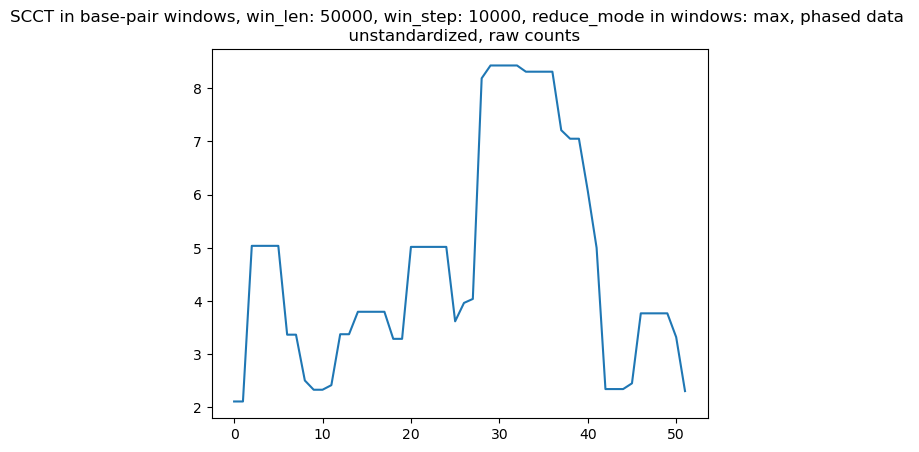

In [7]:
generator = SaiWindowDataGenerator(
    vcf_file=vcf_file,
    src_ind_file=src_ind_file,
    ref_ind_file=ref_ind_file,
    tgt_ind_file=tgt_ind_file,
    anc_allele_file=anc_allele_file,
    ploidy=ploidy,
    is_phased=is_phased,
    chr_name=chr_name,
    win_len=win_len,
    win_step=win_step,
)

full_vcf = load_full_vcf(vcf_file, "9", ref_ind_file, tgt_ind_file, src_ind_file=src_ind_file)
full_vcf_tgt_gts = full_vcf[2]
full_vcf_positions = full_vcf[-1]

snp_window_size = 71
reduce_mode="max"

all_results = []
for elem in generator.get():
    #print(elem)
    tgt_gts = elem["tgt_gts"]
    tgt_gts_pos = elem["pos"]

    results = scct_windows_from_bpwindows(tgt_gts, tgt_gts_pos, snp_window_size = snp_window_size, full_vcf_gts=full_vcf_tgt_gts, full_vcf_pos=full_vcf_positions, function_to_apply=sample_scct, function_params={"theoretical": False, "set_alpha_1": True}, reduce_mode=reduce_mode)
    all_results.append(results)

plt.plot(all_results[1:])
plt.title(f"SCCT in base-pair windows, win_len: {win_len}, win_step: {win_step}, reduce_mode in windows: {reduce_mode}, phased data \n  unstandardized, raw counts")

snp_window_size (71) is larger than the number of SNPs (65). Returning [0].
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan


/home/jalh/Desktop/sai_sim/sai/stats/scct_feature.py:287: RuntimeWarning: divide by zero encountered in log
  S = np.log(sum_D / (ratio_alpha * sum_C))


Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the cent

Text(0.5, 1.0, 'SCCT in base-pair windows, win_len: 50000, win_step: 10000, reduce_mode in windows: max, phased data \n  unstandardized, log counts')

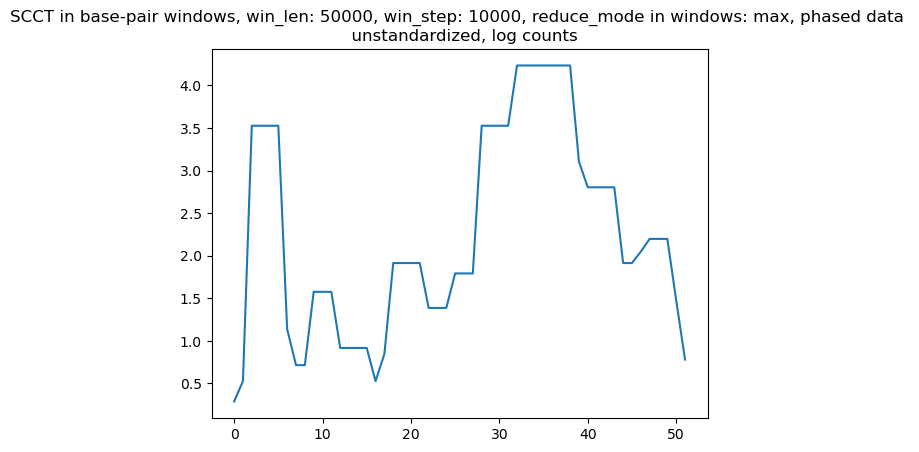

In [8]:
generator = SaiWindowDataGenerator(
    vcf_file=vcf_file,
    src_ind_file=src_ind_file,
    ref_ind_file=ref_ind_file,
    tgt_ind_file=tgt_ind_file,
    anc_allele_file=anc_allele_file,
    ploidy=ploidy,
    is_phased=is_phased,
    chr_name=chr_name,
    win_len=win_len,
    win_step=win_step,
)

full_vcf = load_full_vcf(vcf_file, "9", ref_ind_file, tgt_ind_file, src_ind_file=src_ind_file)
full_vcf_tgt_gts = full_vcf[2]
full_vcf_positions = full_vcf[-1]

snp_window_size = 71
reduce_mode="max"

all_results = []
for elem in generator.get():
    #print(elem)
    tgt_gts = elem["tgt_gts"]
    tgt_gts_pos = elem["pos"]

    results = scct_windows_from_bpwindows(tgt_gts, tgt_gts_pos, snp_window_size = snp_window_size, full_vcf_gts=full_vcf_tgt_gts, full_vcf_pos=full_vcf_positions, function_to_apply=sample_scct, function_params={"theoretical": False, "set_alpha_1": True, "use_log_ratio": True}, reduce_mode=reduce_mode)
    all_results.append(results)

plt.plot(all_results[1:])
plt.title(f"SCCT in base-pair windows, win_len: {win_len}, win_step: {win_step}, reduce_mode in windows: {reduce_mode}, phased data \n  unstandardized, log counts")

snp_window_size (71) is larger than the number of SNPs (65). Returning [0].
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error:

Text(0.5, 1.0, 'SCCT in base-pair windows, win_len: 50000, win_step: 10000, reduce_mode in windows: max, phased data \n  unstandardized, simple log counts')

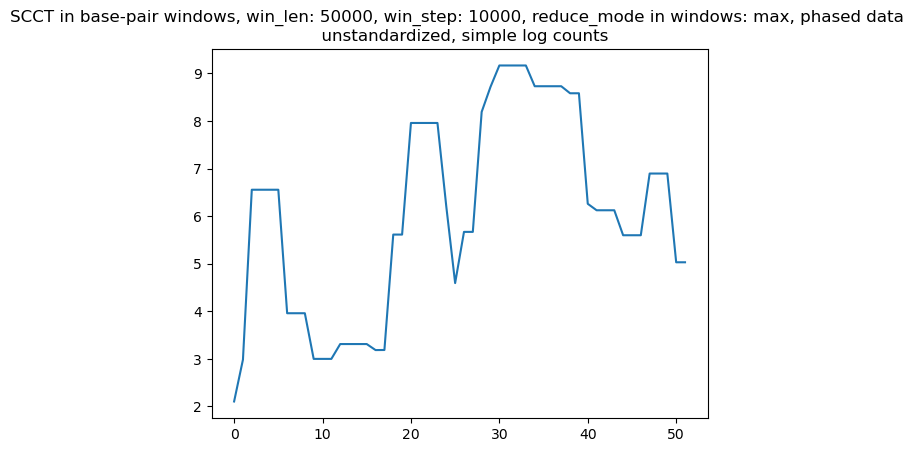

In [9]:
generator = SaiWindowDataGenerator(
    vcf_file=vcf_file,
    src_ind_file=src_ind_file,
    ref_ind_file=ref_ind_file,
    tgt_ind_file=tgt_ind_file,
    anc_allele_file=anc_allele_file,
    ploidy=ploidy,
    is_phased=is_phased,
    chr_name=chr_name,
    win_len=win_len,
    win_step=win_step,
)

full_vcf = load_full_vcf(vcf_file, "9", ref_ind_file, tgt_ind_file, src_ind_file=src_ind_file)
full_vcf_tgt_gts = full_vcf[2]
full_vcf_positions = full_vcf[-1]

snp_window_size = 71
reduce_mode="max"

all_results = []
for elem in generator.get():
    #print(elem)
    tgt_gts = elem["tgt_gts"]
    tgt_gts_pos = elem["pos"]

    results = scct_windows_from_bpwindows(tgt_gts, tgt_gts_pos, snp_window_size = snp_window_size, full_vcf_gts=full_vcf_tgt_gts, full_vcf_pos=full_vcf_positions, function_to_apply=sample_scct, function_params={"theoretical": False, "set_alpha_1": True, "use_log_ratio": True, "simple_log_ratio" : True}, reduce_mode=reduce_mode)
    all_results.append(results)

plt.plot(all_results[1:])
plt.title(f"SCCT in base-pair windows, win_len: {win_len}, win_step: {win_step}, reduce_mode in windows: {reduce_mode}, phased data \n  unstandardized, simple log counts")

# Theoretical alpha ratio

snp_window_size (71) is larger than the number of SNPs (65). Returning [0].
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error:

Text(0.5, 1.0, 'SCCT in base-pair windows, win_len: 50000, win_step: 10000, reduce_mode in windows: max, phased data \n  theoretical alpha, raw counts')

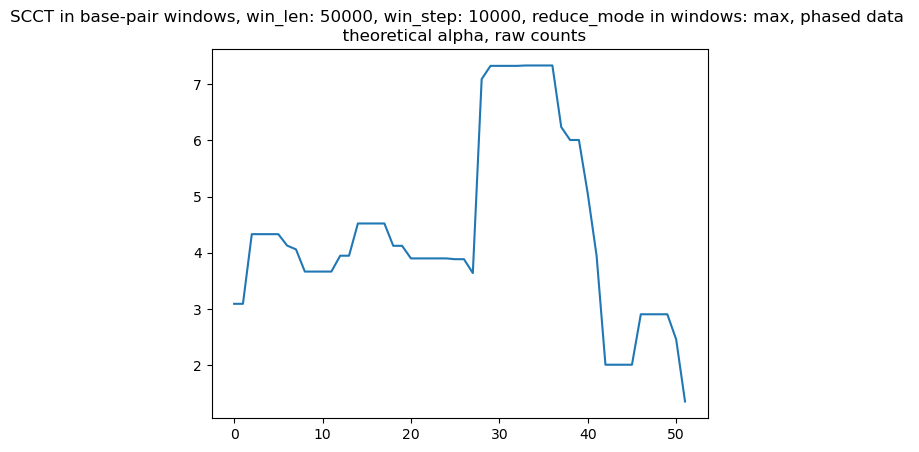

In [10]:
generator = SaiWindowDataGenerator(
    vcf_file=vcf_file,
    src_ind_file=src_ind_file,
    ref_ind_file=ref_ind_file,
    tgt_ind_file=tgt_ind_file,
    anc_allele_file=anc_allele_file,
    ploidy=ploidy,
    is_phased=is_phased,
    chr_name=chr_name,
    win_len=win_len,
    win_step=win_step,
)

full_vcf = load_full_vcf(vcf_file, "9", ref_ind_file, tgt_ind_file, src_ind_file=src_ind_file)
full_vcf_tgt_gts = full_vcf[2]
full_vcf_positions = full_vcf[-1]

snp_window_size = 71
reduce_mode="max"

all_results = []
for elem in generator.get():
    #print(elem)
    tgt_gts = elem["tgt_gts"]
    tgt_gts_pos = elem["pos"]

    results = scct_windows_from_bpwindows(tgt_gts, tgt_gts_pos, snp_window_size = snp_window_size, full_vcf_gts=full_vcf_tgt_gts, full_vcf_pos=full_vcf_positions, function_to_apply=sample_scct, function_params=None, reduce_mode=reduce_mode)
    all_results.append(results)

plt.plot(all_results[1:])
plt.title(f"SCCT in base-pair windows, win_len: {win_len}, win_step: {win_step}, reduce_mode in windows: {reduce_mode}, phased data \n  theoretical alpha, raw counts")

snp_window_size (71) is larger than the number of SNPs (65). Returning [0].
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error:

Text(0.5, 1.0, 'SCCT in base-pair windows, win_len: 50000, win_step: 10000, reduce_mode in windows: max, phased data \n  theoretical alpha, log counts')

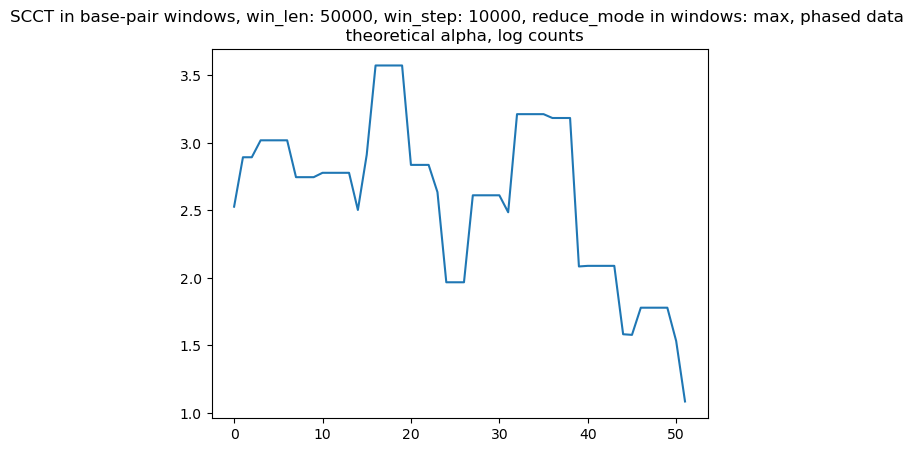

In [11]:
generator = SaiWindowDataGenerator(
    vcf_file=vcf_file,
    src_ind_file=src_ind_file,
    ref_ind_file=ref_ind_file,
    tgt_ind_file=tgt_ind_file,
    anc_allele_file=anc_allele_file,
    ploidy=ploidy,
    is_phased=is_phased,
    chr_name=chr_name,
    win_len=win_len,
    win_step=win_step,
)

full_vcf = load_full_vcf(vcf_file, "9", ref_ind_file, tgt_ind_file, src_ind_file=src_ind_file)
full_vcf_tgt_gts = full_vcf[2]
full_vcf_positions = full_vcf[-1]

snp_window_size = 71
reduce_mode="max"

all_results = []
for elem in generator.get():
    #print(elem)
    tgt_gts = elem["tgt_gts"]
    tgt_gts_pos = elem["pos"]

    results = scct_windows_from_bpwindows(tgt_gts, tgt_gts_pos, snp_window_size = snp_window_size, full_vcf_gts=full_vcf_tgt_gts, full_vcf_pos=full_vcf_positions, function_to_apply=sample_scct, function_params={"theoretical": True, "use_log_ratio": True, "simple_log_ratio" : False}, reduce_mode=reduce_mode)
    all_results.append(results)

plt.plot(all_results[1:])
plt.title(f"SCCT in base-pair windows, win_len: {win_len}, win_step: {win_step}, reduce_mode in windows: {reduce_mode}, phased data \n  theoretical alpha, log counts")

snp_window_size (71) is larger than the number of SNPs (65). Returning [0].
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error:

Text(0.5, 1.0, 'SCCT in base-pair windows, win_len: 50000, win_step: 10000, reduce_mode in windows: max, phased data \n  theoretical alpha, simple log counts')

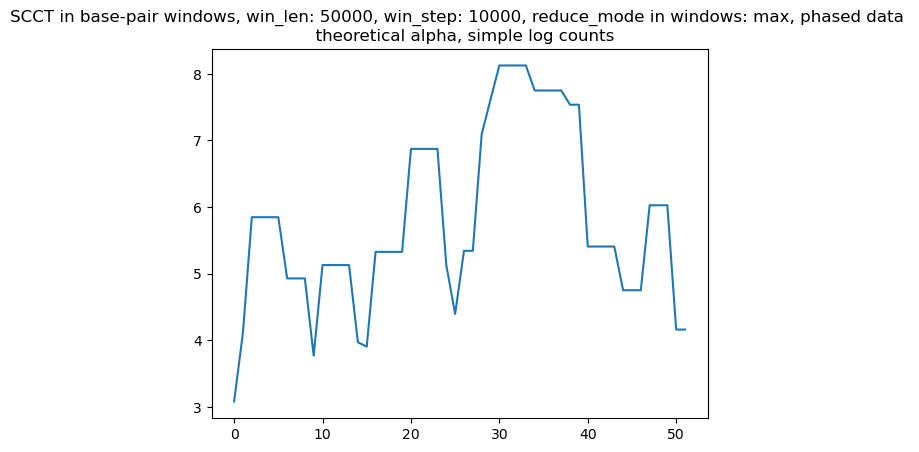

In [12]:
generator = SaiWindowDataGenerator(
    vcf_file=vcf_file,
    src_ind_file=src_ind_file,
    ref_ind_file=ref_ind_file,
    tgt_ind_file=tgt_ind_file,
    anc_allele_file=anc_allele_file,
    ploidy=ploidy,
    is_phased=is_phased,
    chr_name=chr_name,
    win_len=win_len,
    win_step=win_step,
)

full_vcf = load_full_vcf(vcf_file, "9", ref_ind_file, tgt_ind_file, src_ind_file=src_ind_file)
full_vcf_tgt_gts = full_vcf[2]
full_vcf_positions = full_vcf[-1]

snp_window_size = 71
reduce_mode="max"

all_results = []
for elem in generator.get():
    #print(elem)
    tgt_gts = elem["tgt_gts"]
    tgt_gts_pos = elem["pos"]

    results = scct_windows_from_bpwindows(tgt_gts, tgt_gts_pos, snp_window_size = snp_window_size, full_vcf_gts=full_vcf_tgt_gts, full_vcf_pos=full_vcf_positions, function_to_apply=sample_scct, function_params={"theoretical": True, "use_log_ratio": True, "simple_log_ratio" : True}, reduce_mode=reduce_mode)
    all_results.append(results)

plt.plot(all_results[1:])
plt.title(f"SCCT in base-pair windows, win_len: {win_len}, win_step: {win_step}, reduce_mode in windows: {reduce_mode}, phased data \n  theoretical alpha, simple log counts")

# Empirical alpha ratio

snp_window_size (71) is larger than the number of SNPs (65). Returning [0].
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error:

Text(0.5, 1.0, 'SCCT in base-pair windows, win_len: 50000, win_step: 10000, reduce_mode in windows: max, phased data \n  empirical alpha, raw counts')

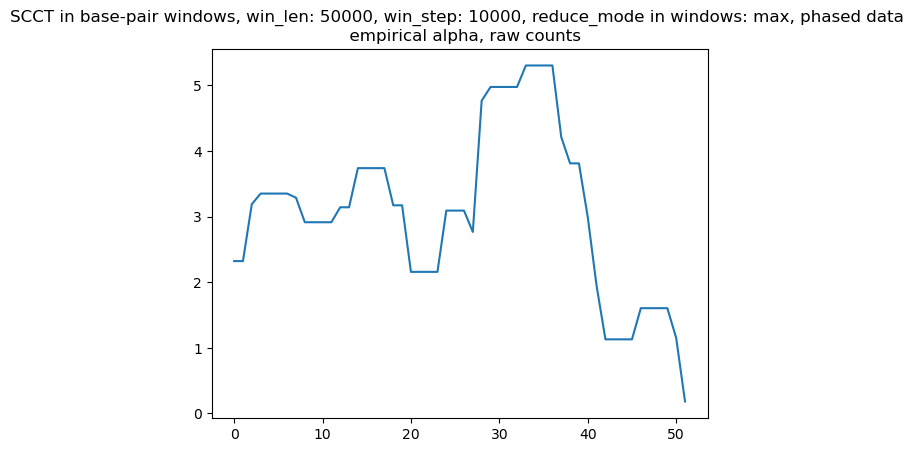

In [13]:
generator = SaiWindowDataGenerator(
    vcf_file=vcf_file,
    src_ind_file=src_ind_file,
    ref_ind_file=ref_ind_file,
    tgt_ind_file=tgt_ind_file,
    anc_allele_file=anc_allele_file,
    ploidy=ploidy,
    is_phased=is_phased,
    chr_name=chr_name,
    win_len=win_len,
    win_step=win_step,
)

full_vcf = load_full_vcf(vcf_file, "9", ref_ind_file, tgt_ind_file, src_ind_file=src_ind_file)
full_vcf_tgt_gts = full_vcf[2]
full_vcf_positions = full_vcf[-1]

snp_window_size = 71
reduce_mode="max"

all_results_emp = []
for elem in generator.get():
    #print(elem)
    tgt_gts = elem["tgt_gts"]
    tgt_gts_pos = elem["pos"]

    results = scct_windows_from_bpwindows(tgt_gts, tgt_gts_pos, snp_window_size = snp_window_size, full_vcf_gts=full_vcf_tgt_gts, full_vcf_pos=full_vcf_positions, function_to_apply=sample_scct, function_params={"theoretical": False}, reduce_mode=reduce_mode)

    all_results_emp.append(results)

plt.plot(all_results_emp[1:])
plt.title(f"SCCT in base-pair windows, win_len: {win_len}, win_step: {win_step}, reduce_mode in windows: {reduce_mode}, phased data \n  empirical alpha, raw counts")

snp_window_size (71) is larger than the number of SNPs (65). Returning [0].
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error:

Text(0.5, 1.0, 'SCCT in base-pair windows, win_len: 50000, win_step: 10000, reduce_mode in windows: max, phased data \n  empirical alpha, log counts')

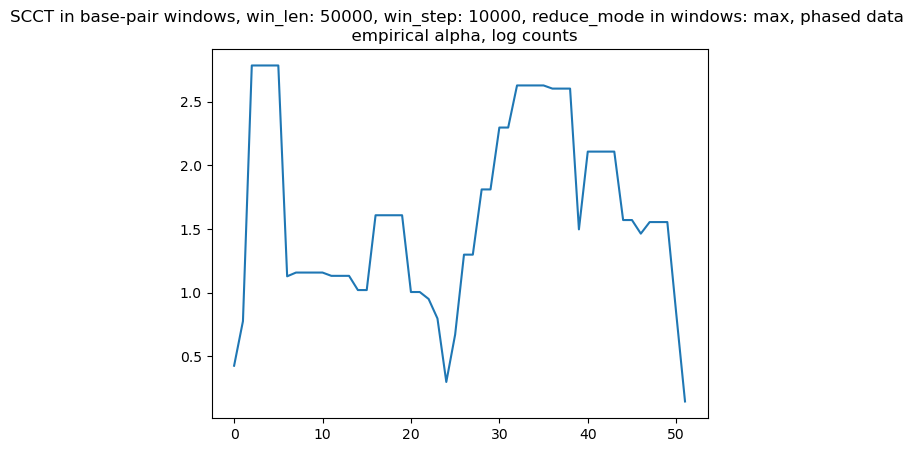

In [15]:
generator = SaiWindowDataGenerator(
    vcf_file=vcf_file,
    src_ind_file=src_ind_file,
    ref_ind_file=ref_ind_file,
    tgt_ind_file=tgt_ind_file,
    anc_allele_file=anc_allele_file,
    ploidy=ploidy,
    is_phased=is_phased,
    chr_name=chr_name,
    win_len=win_len,
    win_step=win_step,
)

full_vcf = load_full_vcf(vcf_file, "9", ref_ind_file, tgt_ind_file, src_ind_file=src_ind_file)
full_vcf_tgt_gts = full_vcf[2]
full_vcf_positions = full_vcf[-1]

snp_window_size = 71
reduce_mode="max"



all_results_emp = []
for elem in generator.get():
    #print(elem)
    tgt_gts = elem["tgt_gts"]
    tgt_gts_pos = elem["pos"]

    results = scct_windows_from_bpwindows(tgt_gts, tgt_gts_pos, snp_window_size = snp_window_size, full_vcf_gts=full_vcf_tgt_gts, full_vcf_pos=full_vcf_positions, function_to_apply=sample_scct, function_params={"theoretical": False, "use_log_ratio": True, "simple_log_ratio" : False}, reduce_mode=reduce_mode)

    all_results_emp.append(results)

plt.plot(all_results_emp[1:])
plt.title(f"SCCT in base-pair windows, win_len: {win_len}, win_step: {win_step}, reduce_mode in windows: {reduce_mode}, phased data \n  empirical alpha, log counts")

snp_window_size (71) is larger than the number of SNPs (65). Returning [0].
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error:

Text(0.5, 1.0, 'SCCT in base-pair windows, win_len: 50000, win_step: 10000, reduce_mode in windows: max, phased data \n  empirical alpha, simple log counts')

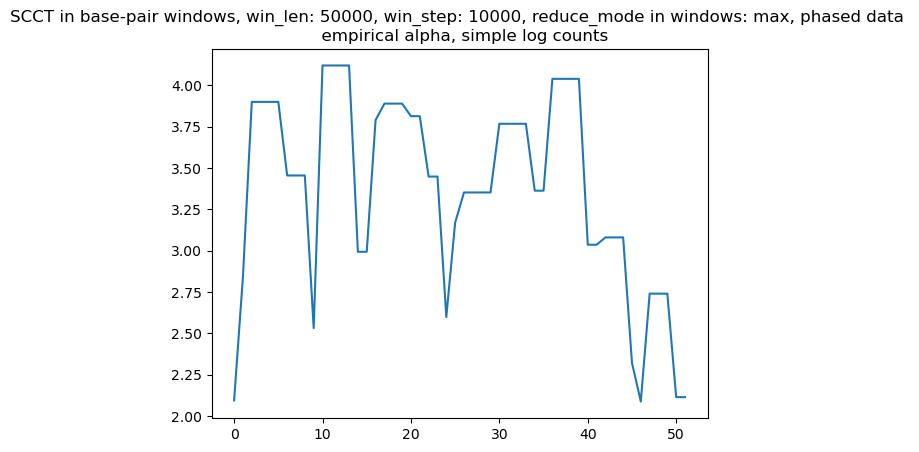

In [16]:
generator = SaiWindowDataGenerator(
    vcf_file=vcf_file,
    src_ind_file=src_ind_file,
    ref_ind_file=ref_ind_file,
    tgt_ind_file=tgt_ind_file,
    anc_allele_file=anc_allele_file,
    ploidy=ploidy,
    is_phased=is_phased,
    chr_name=chr_name,
    win_len=win_len,
    win_step=win_step,
)

full_vcf = load_full_vcf(vcf_file, "9", ref_ind_file, tgt_ind_file, src_ind_file=src_ind_file)
full_vcf_tgt_gts = full_vcf[2]
full_vcf_positions = full_vcf[-1]

snp_window_size = 71
reduce_mode="max"



all_results_emp = []
for elem in generator.get():
    #print(elem)
    tgt_gts = elem["tgt_gts"]
    tgt_gts_pos = elem["pos"]

    results = scct_windows_from_bpwindows(tgt_gts, tgt_gts_pos, snp_window_size = snp_window_size, full_vcf_gts=full_vcf_tgt_gts, full_vcf_pos=full_vcf_positions, function_to_apply=sample_scct, function_params={"theoretical": False, "use_log_ratio": True, "simple_log_ratio" : True}, reduce_mode=reduce_mode)

    all_results_emp.append(results)

plt.plot(all_results_emp[1:])
plt.title(f"SCCT in base-pair windows, win_len: {win_len}, win_step: {win_step}, reduce_mode in windows: {reduce_mode}, phased data \n  empirical alpha, simple log counts")

## simple example for frequencies

In [17]:
is_phased = False

In [ ]:
generator = SaiWindowDataGenerator(
    vcf_file=vcf_file,
    src_ind_file=src_ind_file,
    ref_ind_file=ref_ind_file,
    tgt_ind_file=tgt_ind_file,
    anc_allele_file=anc_allele_file,
    ploidy=ploidy,
    is_phased=is_phased,
    chr_name=chr_name,
    win_len=win_len,
    win_step=10000,
)


for ie, elem in enumerate(generator.get()):
    
    tgt_gts = elem["tgt_gts"]
    tgt_gts_pos = elem["pos"]

    print(tgt_gts)

    if ie < 15:
        break

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
np.unique(tgt_gts, return_counts=True)

(array([0, 1, 2]), array([138197,   2695,    954]))

In [20]:
filtered_tgt_gts = filter_zero_rows(tgt_gts)
freqres = frequency_by_snp_group(filtered_tgt_gts, is_phased=False)

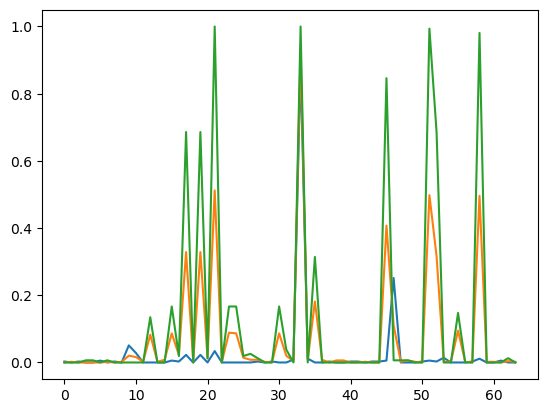

In [21]:
for key in freqres:
    #print(freqres[key])
    plt.plot(freqres[key])

In [22]:
countres = counts_by_snp_group(filtered_tgt_gts)

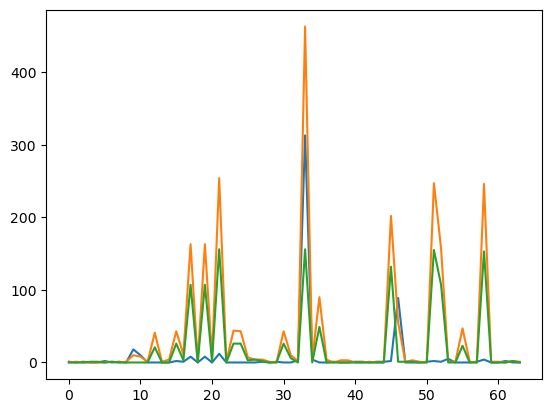

In [23]:
for key in countres:
    plt.plot(countres[key]['per_snp_counts'])

In [24]:
is_phased = True
generator = SaiWindowDataGenerator(
    vcf_file=vcf_file,
    src_ind_file=src_ind_file,
    ref_ind_file=ref_ind_file,
    tgt_ind_file=tgt_ind_file,
    anc_allele_file=anc_allele_file,
    ploidy=ploidy,
    is_phased=is_phased,
    chr_name=chr_name,
    win_len=win_len,
    win_step=10000,
)


for ie, elem in enumerate(generator.get()):
    #print(elem)
    tgt_gts = elem["tgt_gts"]
    tgt_gts_pos = elem["pos"]

    print(tgt_gts)

    if ie < 15:
        break

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
filtered_tgt_gts = filter_zero_rows(tgt_gts)
freqres = frequency_by_snp_group(filtered_tgt_gts)

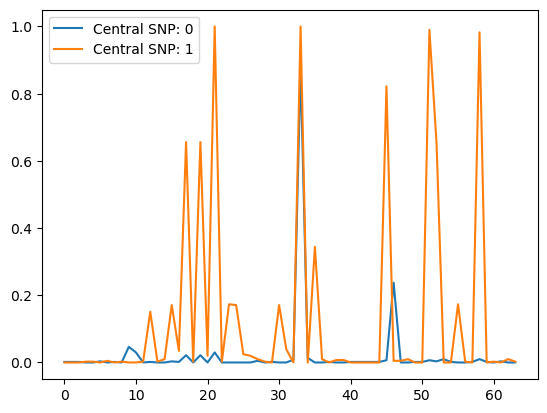

In [26]:
for key in freqres:
    #print(freqres[key])
    plt.plot(freqres[key], label=f"Central SNP: {key}")
plt.legend()